In [1]:
!pip install bs4
!pip install geopy
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
pd.set_option('display.max_row',None)
pd.set_option('display.max_column',None)
import json
from geopy.geocoders import Nominatim
import matplotlib.cm as cm
import matplotlib.colors as colors
! pip install folium
import folium
import requests
from sklearn.cluster import KMeans
print("Imported Libraries")

Imported Libraries


In [0]:
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

In [0]:
soup = BeautifulSoup(url,'html.parser')

In [0]:
postalCodeList = []
boroughList = []
neighborhoodList = []

In [0]:
# for row in soup.find('table').find_all('tr'):
#   cells = row.find_all('td')
#   if (len(cells) >0):
#     # print(cells)
#     postalCodeList.append(cells[0].text.rstrip('\n'))
#     boroughList.append(cells[1].text.rstrip("\n"))
#     neighborhoodList.append(cells[2].text.rstrip("\n"))
# append the data into the respective lists
for row in soup.find('table').find_all('tr'):
    cells = row.find_all('td')
    if(len(cells) > 0):
        postalCodeList.append(cells[0].text.rstrip('\n'))
        boroughList.append(cells[1].text.rstrip('\n'))
        neighborhoodList.append(cells[2].text.rstrip('\n')) # avoid new lines in neighborhood cell

In [0]:
# postalCodeList

In [0]:
df = pd.DataFrame({'postalCodeList':postalCodeList,'boroughList':boroughList,
                   'neighborhoodList':neighborhoodList})

In [8]:
df.head()

,postalCodeList,boroughList,neighborhoodList
0,M1A,Not assigned,
1,M2A,Not assigned,
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [0]:
dropped_df = df[df.boroughList != 'Not assigned'].reset_index(drop=True)

In [10]:
dropped_df.head()

,postalCodeList,boroughList,neighborhoodList
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [0]:
new_df = dropped_df.groupby(['postalCodeList','boroughList'],as_index=False).agg(lambda x: ",".join(x))

In [12]:
new_df.head()

,postalCodeList,boroughList,neighborhoodList
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [13]:
for index, row  in new_df.iterrows():
  if row['neighborhoodList'] == "Not assigned":
    row['neighborhoodList'] ==row ["boroughList"]
new_df.head()

,postalCodeList,boroughList,neighborhoodList
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [14]:
address = 'Toronto'

geolocator = Nominatim(user_agent='foursquare_agent')
location = geolocator.geocode(address)
latitude = location.latitude
longitude  = location.longitude

print('latitude:', latitude)
print('longitude:', longitude)
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

latitude: 43.6534817
longitude: -79.3839347
The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [0]:
geo = pd.read_csv('/content/Geospatial_Coordinates.csv')

In [16]:
geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [0]:
new_df['Latitude'] = geo['Latitude']
new_df['Longitude'] = geo['Longitude']

In [18]:
new_df.head()

,postalCodeList,boroughList,neighborhoodList,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [0]:
# data = pd.merge(new_df,geo)

In [0]:
# data

In [0]:
new_df.rename(columns = {'postalCodeList':'PostalCode',
               'boroughList': 'Borough',
               'neighborhoodList':'Neighborhoods'},inplace=True)

In [22]:
new_df.head()

,PostalCode,Borough,Neighborhoods,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [23]:
map = folium.Map(location =[latitude,longitude],zoom_start =10)

for lat,long, bor,neig in zip(new_df['Latitude'],new_df['Longitude'],new_df['Borough'],new_df['Neighborhoods']):
  label = '{},{}' .format(neig,bor)
  label =folium.Popup(label,parse_html =True)
  folium.CircleMarker([lat,long],
                      radius = 5,
                      popup = label,
                      color ='blue',
                      fill =True,
                      fill_color='#3186cc',
                      fill_opacity=0.7).add_to(map)  

map

In [24]:
CLIENT_ID = 'WCOTU2JERKB0V3L4BGRK5KDCDF0ARWGQGZDAYKEOK33T0OEK' # your Foursquare ID
CLIENT_SECRET = 'O5ZOAHMIHC33AUCZHVSLMNBKLSH4IE5FHF0ZYBL142EV3KH5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WCOTU2JERKB0V3L4BGRK5KDCDF0ARWGQGZDAYKEOK33T0OEK
CLIENT_SECRET:O5ZOAHMIHC33AUCZHVSLMNBKLSH4IE5FHF0ZYBL142EV3KH5


In [25]:
new_df.head(1)

,PostalCode,Borough,Neighborhoods,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353


In [0]:
radius = 500
LIMIT = 100
venues = []
for lat, long, post, borough, neighborhood in zip(new_df['Latitude'],new_df['Longitude'],new_df['PostalCode'],
                                                  new_df['Borough'],new_df['Neighborhoods']):
  
  url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
      CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
  
  results = requests.get(url).json()["response"]['groups'][0]['items']
  for venue in results:
    venues.append((post, 
            borough,
            neighborhood,
            lat,
            long,
            venue['venue']['name'],
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],
            venue['venue']['categories'][0]['name'] ))
    


In [0]:
venues_df = pd.DataFrame(venues)

In [28]:
venues_df.head()

,0,1,2,3,4,5,6,7,8
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
3,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [0]:
# venues_df.rename({0:'PostalCode'})

In [0]:
venues_df.columns = ['PostalCode', 'Borough', 'Neighborhood', 'BoroughLatitude', 
                     'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

In [31]:
venues_df.head()

,PostalCode,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
3,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [32]:
venues_df.shape

(2137, 9)

In [33]:
len(venues_df['VenueCategory'])

2137

In [34]:
venues_df['VenueCategory'].unique()[:90]

array(['Fast Food Restaurant', 'Bar', 'Construction & Landscaping',
       'Bank', 'Electronics Store', 'Mexican Restaurant',
       'Rental Car Location', 'Medical Center', 'Intersection',
       'Breakfast Spot', 'Coffee Shop', 'Korean Restaurant',
       'Hakka Restaurant', 'Caribbean Restaurant', 'Thai Restaurant',
       'Athletics & Sports', 'Bakery', 'Gas Station',
       'Fried Chicken Joint', 'Playground', 'Convenience Store',
       'Department Store', 'Discount Store', 'Hobby Shop',
       'Train Station', 'Bus Station', 'Ice Cream Shop', 'Bus Line',
       'Park', 'Soccer Field', 'Motel', 'American Restaurant', 'Café',
       'General Entertainment', 'Skating Rink', 'College Stadium',
       'Indian Restaurant', 'Chinese Restaurant', 'Vietnamese Restaurant',
       'Pet Store', 'Sandwich Place', 'Middle Eastern Restaurant',
       'Shopping Mall', 'Auto Garage', 'Latin American Restaurant',
       'Lounge', 'Italian Restaurant', 'Noodle House', 'Pizza Place',
       'Pharma

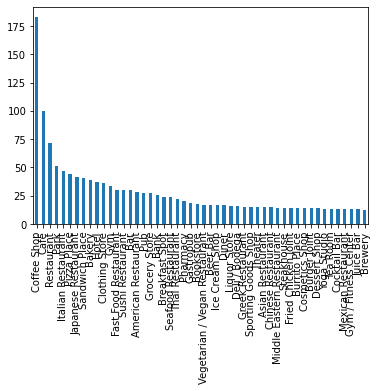

In [35]:
venues_df['VenueCategory'].value_counts()[:50].plot.bar()

In [36]:
toronto_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")


toronto_onehot['PostalCode'] = venues_df['PostalCode'] 
toronto_onehot['Borough'] = venues_df['Borough'] 
toronto_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

#Lets put PostalCode, Borough, Neighborhood in the first place

fixed_columns = list(toronto_onehot.columns[-3:]) + list(toronto_onehot.columns[:-3])

toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,PostalCode,Borough,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,Scarborough,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [37]:
# toronto_onehot
toronto_onehot.shape

(2137, 269)

In [0]:
# manhattan_onehot.groupby('Neighborhood').mean().reset_index()

In [0]:
toronto_onehot_groupy = toronto_onehot.groupby(["PostalCode", "Borough", "Neighborhoods"]).mean().reset_index()

In [40]:
toronto_onehot_groupy.head()

,PostalCode,Borough,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,Scarborough,"Malvern, Rouge",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
toronto_onehot_groupy.head()

,PostalCode,Borough,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1B,Scarborough,"Malvern, Rouge",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [0]:
toronto_onehot_groupy.drop(columns=['PostalCode','Borough'],inplace=True)

In [44]:
toronto_onehot_groupy.head()

,Neighborhoods,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Malvern, Rouge",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [45]:
num_top_venues =10

indicators = ['st', 'nd','rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
  try:
    columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))

  except:
    columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_onehot_groupy['Neighborhoods']

for ind in np.arange(toronto_onehot_groupy.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_onehot_groupy.iloc[ind, :], num_top_venues)


neighborhoods_venues_sorted.head()
# neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Malvern, Rouge",Fast Food Restaurant,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
1,"Rouge Hill, Port Union, Highland Creek",Bar,Construction & Landscaping,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
2,"Guildwood, Morningside, West Hill",Electronics Store,Rental Car Location,Mexican Restaurant,Bank,Intersection,Medical Center,Breakfast Spot,Doner Restaurant,Dog Run,Donut Shop
3,Woburn,Coffee Shop,Korean Restaurant,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
4,Cedarbrae,Fried Chicken Joint,Gas Station,Bakery,Hakka Restaurant,Bank,Athletics & Sports,Caribbean Restaurant,Thai Restaurant,Dessert Shop,Dim Sum Restaurant


**Machine** **learing**

In [46]:
kclusters = 5 

toronto_grouped_clustering =toronto_onehot_groupy.drop(columns=['Neighborhoods'])
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:80] 

array([2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 4, 3,
       1, 0, 1, 0, 3, 3, 3, 1, 3, 4, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2], dtype=int32)

In [47]:
toronto_onehot_groupy.columns

Index(['Neighborhoods', 'Accessories Store', 'Afghan Restaurant', 'Airport',
       'Airport Food Court', 'Airport Gate', 'Airport Lounge',
       'Airport Service', 'Airport Terminal', 'American Restaurant',
       ...
       'Train Station', 'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Video Store', 'Vietnamese Restaurant', 'Warehouse Store', 'Wine Bar',
       'Wings Joint', 'Women's Store', 'Yoga Studio'],
      dtype='object', length=267)

In [0]:

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [49]:
neighborhoods_venues_sorted.head(3)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,"Malvern, Rouge",Fast Food Restaurant,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
1,3,"Rouge Hill, Port Union, Highland Creek",Bar,Construction & Landscaping,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
2,3,"Guildwood, Morningside, West Hill",Electronics Store,Rental Car Location,Mexican Restaurant,Bank,Intersection,Medical Center,Breakfast Spot,Doner Restaurant,Dog Run,Donut Shop


In [0]:
neighborhoods_venues_sorted.rename(columns={"Neighborhood":"Neighborhoods"},inplace=True)

In [0]:
# manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = new_df.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhoods')

# toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].fillna(0)


In [0]:
toronto_merged.dropna(axis=0,inplace=True)

In [0]:
# new_df.head()
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
# print(colors_array)
rainbow = [colors.rgb2hex(i) for i in colors_array]
# print(rainbow)

# add markers to the map
markers_colors = []
for lat, lon, post, bor, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['PostalCode'], toronto_merged['Borough'], toronto_merged['Neighborhoods'], toronto_merged['Cluster Labels']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(bor, post, poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [0]:
# dxcbvnm

cluster **1**

In [57]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, 
                   toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Scarborough,0,Pizza Place,Fast Food Restaurant,Noodle House,Coffee Shop,Shopping Mall,Pharmacy,Gas Station,Italian Restaurant,Bank,Fried Chicken Joint
15,Scarborough,0,Fast Food Restaurant,Chinese Restaurant,Coffee Shop,Supermarket,Discount Store,Pharmacy,Pizza Place,Bubble Tea Shop,Sandwich Place,Breakfast Spot
22,North York,0,Grocery Store,Pharmacy,Bank,Home Service,Pizza Place,Butcher,Coffee Shop,Drugstore,Donut Shop,Doner Restaurant
24,North York,0,Grocery Store,Pharmacy,Bank,Home Service,Pizza Place,Butcher,Coffee Shop,Drugstore,Donut Shop,Doner Restaurant
26,North York,0,Café,Japanese Restaurant,Gym / Fitness Center,Athletics & Sports,Caribbean Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
27,North York,0,Café,Japanese Restaurant,Gym / Fitness Center,Athletics & Sports,Caribbean Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
30,North York,0,Grocery Store,Athletics & Sports,Discount Store,Liquor Store,Gym / Fitness Center,Colombian Restaurant,Department Store,Event Space,Ethiopian Restaurant,Electronics Store
31,North York,0,Grocery Store,Athletics & Sports,Discount Store,Liquor Store,Gym / Fitness Center,Colombian Restaurant,Department Store,Event Space,Ethiopian Restaurant,Electronics Store
32,North York,0,Grocery Store,Athletics & Sports,Discount Store,Liquor Store,Gym / Fitness Center,Colombian Restaurant,Department Store,Event Space,Ethiopian Restaurant,Electronics Store
33,North York,0,Grocery Store,Athletics & Sports,Discount Store,Liquor Store,Gym / Fitness Center,Colombian Restaurant,Department Store,Event Space,Ethiopian Restaurant,Electronics Store


Cluster 2

In [58]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, 
                   toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Scarborough,1,Park,Bakery,Playground,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
23,North York,1,Park,Convenience Store,Bank,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Deli / Bodega
25,North York,1,Park,Food & Drink Shop,Bus Stop,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run,Ethiopian Restaurant,Discount Store
30,North York,1,Park,Airport,Snack Place,Gourmet Shop,Event Space,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
31,North York,1,Park,Airport,Snack Place,Gourmet Shop,Event Space,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
32,North York,1,Park,Airport,Snack Place,Gourmet Shop,Event Space,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
33,North York,1,Park,Airport,Snack Place,Gourmet Shop,Event Space,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant
40,East York,1,Park,Convenience Store,Coffee Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run
44,Central Toronto,1,Park,Swim School,Bus Line,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Event Space
50,Downtown Toronto,1,Park,Trail,Playground,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store


Cluster 3

In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2,
                   toronto_merged.columns[[1] + list(range(5,toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,2,Fast Food Restaurant,Deli / Bodega,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
80,York,2,Fast Food Restaurant,Sandwich Place,Bar,Fried Chicken Joint,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run


Cluster 4

In [65]:
toronto_merged.loc[toronto_merged["Cluster Labels"] ==3,
                   toronto_merged.columns[[1] + list(range(5,toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,3,Bar,Construction & Landscaping,Yoga Studio,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
2,Scarborough,3,Electronics Store,Rental Car Location,Mexican Restaurant,Bank,Intersection,Medical Center,Breakfast Spot,Doner Restaurant,Dog Run,Donut Shop
3,Scarborough,3,Coffee Shop,Korean Restaurant,Yoga Studio,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Donut Shop
4,Scarborough,3,Fried Chicken Joint,Gas Station,Bakery,Hakka Restaurant,Bank,Athletics & Sports,Caribbean Restaurant,Thai Restaurant,Dessert Shop,Dim Sum Restaurant
5,Scarborough,3,Playground,Convenience Store,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
6,Scarborough,3,Train Station,Convenience Store,Discount Store,Hobby Shop,Department Store,Bus Station,Coffee Shop,Drugstore,Donut Shop,Eastern European Restaurant
7,Scarborough,3,Bakery,Bus Line,Park,Intersection,Bus Station,Ice Cream Shop,Soccer Field,Donut Shop,Doner Restaurant,Dog Run
8,Scarborough,3,American Restaurant,Motel,Dance Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Yoga Studio
9,Scarborough,3,College Stadium,Skating Rink,Café,General Entertainment,Yoga Studio,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
10,Scarborough,3,Indian Restaurant,Chinese Restaurant,Pet Store,Vietnamese Restaurant,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store


Cluster 5

In [67]:
toronto_merged.loc[toronto_merged["Cluster Labels"] ==4,
                   toronto_merged.columns[[1] + list(range(5,toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,North York,4,Home Service,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Dance Studio
30,North York,4,Food Truck,Home Service,Baseball Field,Yoga Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
31,North York,4,Food Truck,Home Service,Baseball Field,Yoga Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
32,North York,4,Food Truck,Home Service,Baseball Field,Yoga Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
33,North York,4,Food Truck,Home Service,Baseball Field,Yoga Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
97,North York,4,Baseball Field,Yoga Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Farmers Market


In [70]:
toronto_merged.columns[[1] 

'Borough'

In [75]:
# toronto_merged.columns[[1]+list(range(5,toronto_merged.shape[1]))]

KeyError: ignored